In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy.stats as stats

print(np.version)

<module 'numpy.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\numpy\\version.py'>


In [10]:
filename = r'C:\Users\anshs\00ANSH_PYTHON\0_DATASETS and LARGE FILES\stats-1\datasets\combined.csv'
dframe = pd.read_csv(filename, skiprows=1)
dframe.head()


,Date,JPM,GS,CS,UUP,S&P500
0,2018-06-01,108.029999,233.649994,15.680000,24.990000,2767.320068
1,2018-05-01,107.010002,225.084061,15.157627,24.760000,2705.270020
2,2018-04-01,108.231155,237.490189,16.506065,24.129999,2648.050049
3,2018-03-01,109.415154,250.972504,16.525751,23.610001,2640.870117
4,2018-02-01,114.917252,261.270081,18.071041,23.690001,2713.830078


In [30]:
# converting data to returns
JPM_returns = np.array(dframe['JPM'][:-1], np.float) / np.array(dframe['JPM'][1:], np.float) - 1
# returns = all columns of jpm except last / all cols of jpm except first -1

GS_returns = np.array(dframe['GS'][:-1], np.float) / np.array(dframe['GS'][1:], np.float) - 1
CS_returns = np.array(dframe['CS'][:-1], np.float) / np.array(dframe['CS'][1:], np.float) - 1
UUP_returns = np.array(dframe['UUP'][:-1], np.float) / np.array(dframe['UUP'][1:], np.float) - 1
SP500_returns = np.array(dframe['S&P500'][:-1], np.float) / np.array(dframe['S&P500'][1:], np.float) - 1

dframe['JPM_returns'] = np.append(JPM_returns, np.nan)
dframe['GS_returns'] = np.append(GS_returns, np.nan)
dframe['UUP_returns'] = np.append(UUP_returns, np.nan)
dframe['CS_returns'] = np.append(CS_returns, np.nan)
dframe['SP500_returns'] = np.append(SP500_returns, np.nan)

print(dframe.columns)
(dframe.head())


Index(['Date', 'JPM', 'GS', 'CS', 'UUP', 'S&P500', 'JPM_returns', 'GS_returns',
       'UUP_returns', 'CS_returns', 'SP500_returns'],
      dtype='object')


,Date,JPM,GS,CS,UUP,S&P500,JPM_returns,GS_returns,UUP_returns,CS_returns,SP500_returns
0,2018-06-01,108.029999,233.649994,15.680000,24.990000,2767.320068,0.009532,0.038057,0.009289,0.034463,0.022937
1,2018-05-01,107.010002,225.084061,15.157627,24.760000,2705.270020,-0.011283,-0.052238,0.026109,-0.081693,0.021608
2,2018-04-01,108.231155,237.490189,16.506065,24.129999,2648.050049,-0.010821,-0.053720,0.022024,-0.001191,0.002719
3,2018-03-01,109.415154,250.972504,16.525751,23.610001,2640.870117,-0.047879,-0.039414,-0.003377,-0.085512,-0.026884
4,2018-02-01,114.917252,261.270081,18.071041,23.690001,2713.830078,0.003732,-0.018515,0.018925,-0.050672,-0.038947


In [17]:
from sklearn import linear_model, datasets


In [18]:
# making a simple regression model

x = dframe['UUP_returns'][0:-2].values.reshape(-1, 1)
y = dframe['JPM_returns'][0:-2]

regression_object = linear_model.LinearRegression()
regression_object.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.16002931470758108
[-1.26616376]
0.015120532039544814


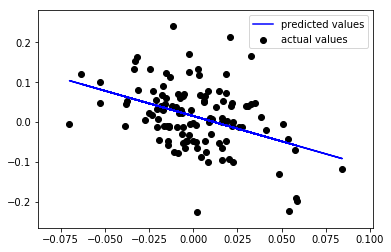

In [25]:
print(regression_object.score(x, y))
print(regression_object.coef_)
print(regression_object.intercept_)
plt.scatter(x, y, color='black', label='actual values')
plt.plot(x, regression_object.predict(x), color='blue', label='predicted values')
plt.legend()


In [26]:
from sklearn.linear_model import  SGDRegressor,LinearRegression


In [41]:
# making a multiple regression model
snp500_returns_data = dframe['SP500_returns'][0:-2]
uup_returns_data = dframe['UUP_returns'][0:-2]
x1 = np.vstack((snp500_returns_data, uup_returns_data))
# print(type(x1),x1)
x1 = x1.T
y = dframe['JPM_returns'][0:-2]


In [40]:
regression_object = linear_model.LinearRegression()
regression_object.fit(x1, y)

print(regression_object.score(x1, y))
print(regression_object.coef_)
print(regression_object.intercept_)


0.45701225521518696
[ 1.26415503 -0.07875078]
0.004218268026247408


In [45]:
snp500_returns_data = dframe['SP500_returns'][0:-2]
uup_returns_data = dframe['UUP_returns'][0:-2]
x1 = np.vstack((snp500_returns_data, uup_returns_data))
x1 = x1.T
y1 = dframe['CS_returns'][0:-2]


In [46]:
regression_object = linear_model.LinearRegression()
regression_object.fit(x1, y1)

print(regression_object.score(x1, y1))
print(regression_object.coef_)
print(regression_object.intercept_)

0.39269092931013005
[ 1.11030665 -0.79309494]
-0.00921465808400069


In [48]:
# MULTIPLE REGRESSION USING STATS MODEL API
import  statsmodels.api as sm
# weirdly confusing, there fore skipped

In [51]:
# COVARIANCE MODEL

In [52]:
filename = r'C:\Users\anshs\00ANSH_PYTHON\0_DATASETS and LARGE FILES\stats-1\datasets\portfolio.csv'
dframe = pd.read_csv(filename)
dframe.head()

,Date,JPM,GS,CS,HSBC,MS,WFC,UBS
0,2008-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-07-01,31.969940,161.887344,34.630093,49.926769,33.715347,23.540037,15.430564
2,2008-08-01,30.625271,144.513794,32.200161,47.627384,35.128151,23.540037,17.492233
3,2008-09-01,37.157700,112.811852,33.519272,49.486458,19.788092,29.503963,14.016166
4,2008-10-01,32.821312,81.524216,25.965631,36.121494,15.030342,26.768183,13.504741


In [56]:
invbank_returns = dframe[[key for key in dict(dframe.dtypes) if dict(dframe.dtypes)[key] in ['float64', 'int64']]].pct_change()
invbank_returns.head()

,JPM,GS,CS,HSBC,MS,WFC,UBS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.042060,-0.107319,-0.070168,-0.046055,0.041904,0.000000,0.133609
3,0.213302,-0.219370,0.040966,0.039034,-0.436688,0.253352,-0.198721
4,-0.116702,-0.277344,-0.225352,-0.270073,-0.240435,-0.092726,-0.036488


In [58]:
invbank_returns=invbank_returns[2:]
invbank_returns['Intercept']=1
invbank_returns.head()


,JPM,GS,CS,HSBC,MS,WFC,UBS,Intercept
4,-0.116702,-0.277344,-0.225352,-0.270073,-0.240435,-0.092726,-0.036488,1
5,-0.226563,-0.143449,-0.208289,-0.078475,-0.145176,-0.151542,-0.246154,1
6,-0.004106,0.068363,-0.045593,-0.089218,0.087457,0.030400,0.122449,1
7,-0.190929,-0.043370,-0.098018,-0.201972,0.261222,-0.358887,-0.129371,1
8,-0.093346,0.128205,-0.052177,-0.104016,-0.020748,-0.359788,-0.273092,1


In [59]:
invbank_returns.cov()

,JPM,GS,CS,HSBC,MS,WFC,UBS,Intercept
JPM,0.006385,0.005428,0.005485,0.004012,0.005523,0.005284,0.004395,0.0
GS,0.005428,0.007283,0.005945,0.003816,0.006594,0.003843,0.003126,0.0
CS,0.005485,0.005945,0.009675,0.004436,0.006245,0.004821,0.008207,0.0
HSBC,0.004012,0.003816,0.004436,0.006812,0.004060,0.003903,0.004048,0.0
MS,0.005523,0.006594,0.006245,0.004060,0.009629,0.003632,0.004059,0.0
WFC,0.005284,0.003843,0.004821,0.003903,0.003632,0.007958,0.007428,0.0
UBS,0.004395,0.003126,0.008207,0.004048,0.004059,0.007428,1.128687,0.0
Intercept,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
# its also confusing , so meh